## EDA

Antes de adentrarme en los detalles del modelo y sus resultados, es crucial comenzar con la primera fase del proceso: el Análisis Exploratorio de Datos (EDA). En esta etapa, el objetivo es examinar y transformar los datos para obtener una comprensión profunda de sus características y patrones. Esto nos permitirá seleccionar las variables más relevantes y preparar los datos de manera óptima para el entrenamiento y validación del modelo de Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


df=pd.read_csv('./TravelInsurancePrediction.csv')


In [2]:

Cambiar_col = {
    "Age": "Edad",
    "Employment Type": "Tipo_Empleo",
    "GraduateOrNot": "Graduado_Universitario",
    "AnnualIncome": "Ingreso_Anual",
    "FamilyMembers": "Miembros_Familia",
    "ChronicDiseases": "Enfermedades_Cronicas",
    "FrequentFlyer": "Viajero_Frecuente",
    "EverTravelledAbroad":"Visito_Extranjero",
    "TravelInsurance":"Seguro_Viajes"}
df.set_index("Unnamed: 0", inplace=True)
df.index.name = "ID"
df = df.rename(columns=Cambiar_col)
print(df.head())

    Edad                   Tipo_Empleo Graduado_Universitario  Ingreso_Anual   
ID                                                                             
0     31             Government Sector                    Yes         400000  \
1     31  Private Sector/Self Employed                    Yes        1250000   
2     34  Private Sector/Self Employed                    Yes         500000   
3     28  Private Sector/Self Employed                    Yes         700000   
4     28  Private Sector/Self Employed                    Yes         700000   

    Miembros_Familia  Enfermedades_Cronicas Viajero_Frecuente   
ID                                                              
0                  6                      1                No  \
1                  7                      0                No   
2                  4                      1                No   
3                  3                      1                No   
4                  8                      1      

## Adaptación de los datos y gráficos

Una vez que tengo una comprensión de los datos, procedo a visualizar las variables numéricas y categóricas. Para las variables numéricas, utilizo gráficos de barras, mientras que para las variables categóricas, empleo gráficos de porcentajes. Estas visualizaciones ayudan a identificar patrones y tendencias en los datos, lo que permite una mejor preparación de los datos para el entrenamiento del modelo.

In [3]:


print(df)
print('--------------')
print(df.describe())
print('--------------')
print(df['Ingreso_Anual'].describe()[['mean', 'max', 'min']])
print('--------------')
print(df['Edad'].describe()[['mean', 'max', 'min']])
print('--------------')
print('Tipo_Empleo')
print(df['Tipo_Empleo'].unique())
print('--------------')
print('Enfermedades_Cronicas')
print(df['Enfermedades_Cronicas'].unique())
df.isnull().sum()

      Edad                   Tipo_Empleo Graduado_Universitario   
ID                                                                
0       31             Government Sector                    Yes  \
1       31  Private Sector/Self Employed                    Yes   
2       34  Private Sector/Self Employed                    Yes   
3       28  Private Sector/Self Employed                    Yes   
4       28  Private Sector/Self Employed                    Yes   
...    ...                           ...                    ...   
1982    33  Private Sector/Self Employed                    Yes   
1983    28  Private Sector/Self Employed                    Yes   
1984    28  Private Sector/Self Employed                    Yes   
1985    34  Private Sector/Self Employed                    Yes   
1986    34  Private Sector/Self Employed                    Yes   

      Ingreso_Anual  Miembros_Familia  Enfermedades_Cronicas   
ID                                                             


Edad                      0
Tipo_Empleo               0
Graduado_Universitario    0
Ingreso_Anual             0
Miembros_Familia          0
Enfermedades_Cronicas     0
Viajero_Frecuente         0
Visito_Extranjero         0
Seguro_Viajes             0
dtype: int64

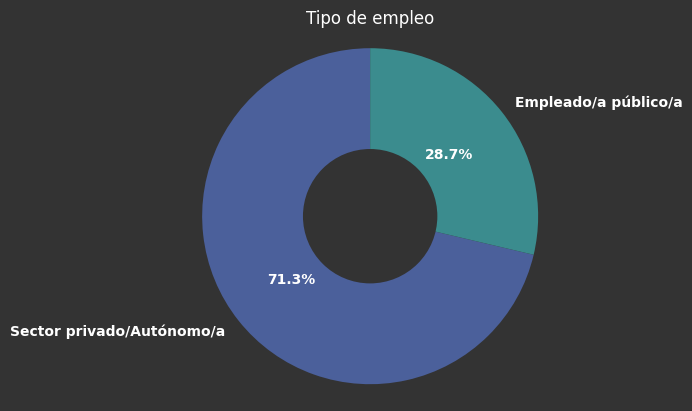

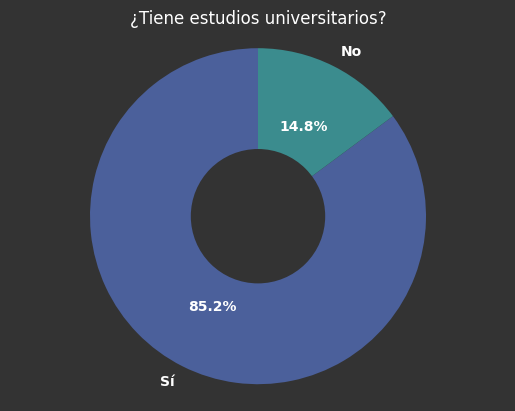

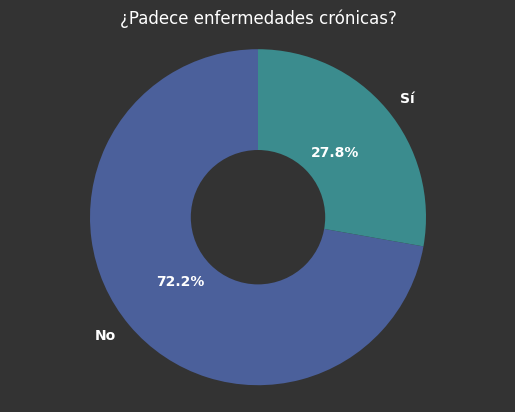

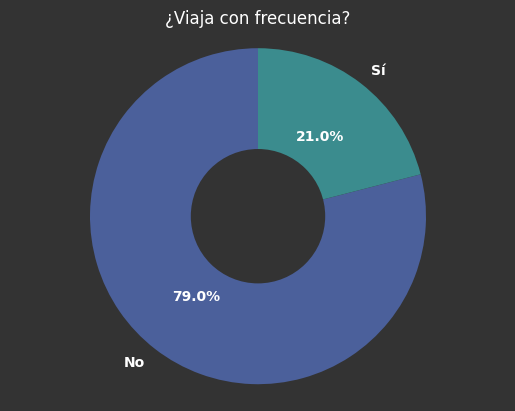

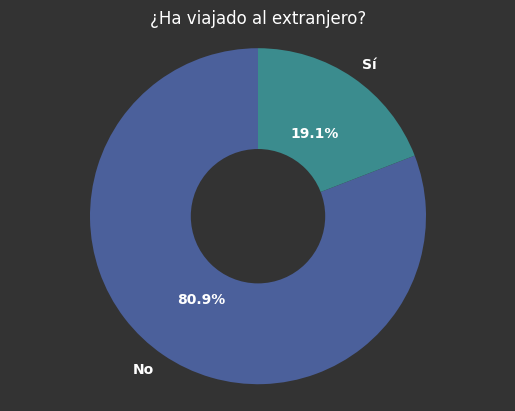

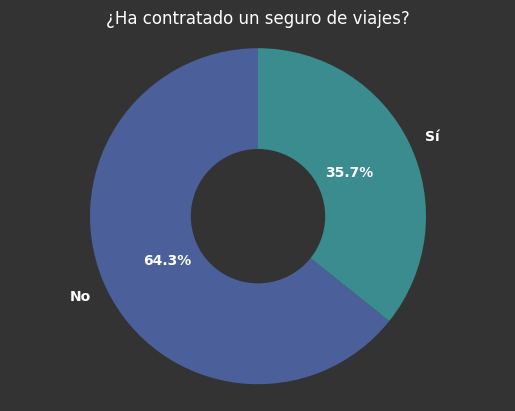

In [10]:

columnas = [ 'Tipo_Empleo','Graduado_Universitario', 'Enfermedades_Cronicas','Viajero_Frecuente','Visito_Extranjero','Seguro_Viajes']

Nombres_espanol={'Tipo_Empleo':'Tipo de empleo',
                 'Graduado_Universitario':'¿Tiene estudios universitarios?',
                 'Enfermedades_Cronicas':'¿Padece enfermedades crónicas?',
                 'Viajero_Frecuente':'¿Viaja con frecuencia?',
                 'Visito_Extranjero':'¿Ha viajado al extranjero?',
                 'Seguro_Viajes':'¿Ha contratado un seguro de viajes?'}

valores_espanol={0:'No',
                 1:'Sí',
                 'Yes':'Sí',
                 'Private Sector/Self Employed':'Sector privado/Autónomo/a',
                 'Government Sector':'Empleado/a público/a'}



for i, columna_nombre in enumerate(columnas):
    columna = df[columna_nombre]
    conteos = columna.value_counts()
    categorias = conteos.index
    categorias_espanol = [valores_espanol.get(cat, cat) for cat in categorias]
    valores = conteos.values

    fig, ax = plt.subplots()
    ax.pie(valores, labels=categorias_espanol, autopct=lambda p: f'{p:.1f}%', startangle=90,
       colors=['#4B609B', '#3B8C8E'], textprops={'color': 'white', 'weight': 'bold'})

    # Dibuja un círculo en el medio
    centro_circulo = plt.Circle((0, 0), 0.40, fc='#333333')
    fig.gca().add_artist(centro_circulo)


    ax.set_facecolor('#333333')
    fig.patch.set_facecolor('#333333') 


    ax.axis('equal')
    plt.title(f"{Nombres_espanol[columna_nombre]}", color='white')

    plt.show()


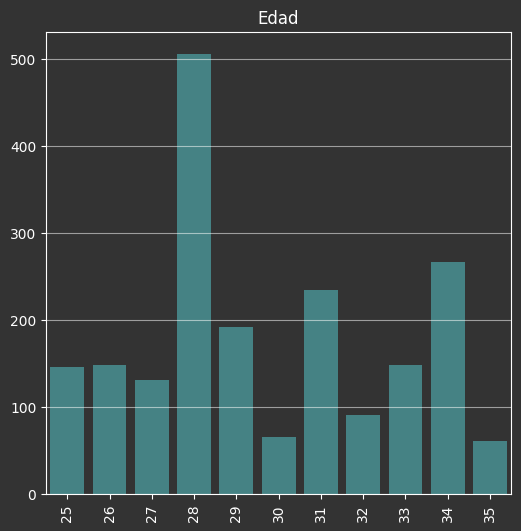

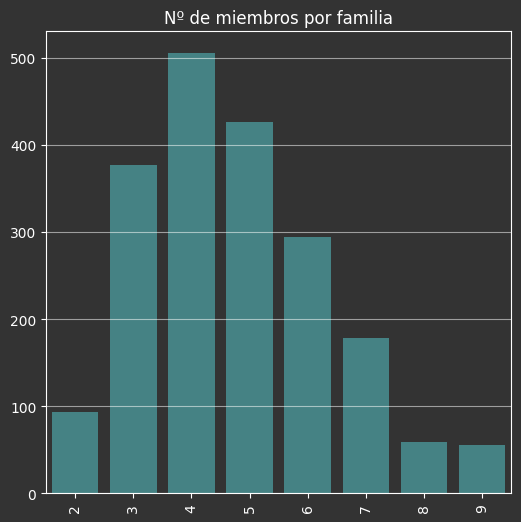

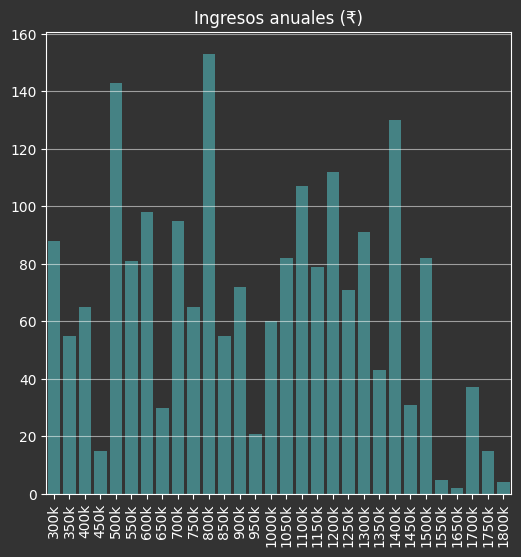

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


variables = ['Edad', 'Miembros_Familia', 'Ingreso_Anual']
color_fondo = ['#3B8C8E']
Titulos = ['Edad', 'Nº de miembros por familia', 'Ingresos anuales (₹)']

#colores parametros
plt.rcParams['axes.facecolor'] = '#333333'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.53
plt.rcParams['grid.color'] = 'white'


# bucle para cada gráfico.
for i, y_var in enumerate(variables):
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.set_facecolor('#333333')
    sns.countplot(data=df, x=y_var, color=color_fondo[0], ax=ax)


    ax.set_title(Titulos[i])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    plt.setp(ax.get_xticklabels(), rotation=90)

  
    if i == len(variables) - 1:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
        tick_labels = ax.get_xticklabels()
        new_tick_labels = [f'{int(float(label.get_text()))/1000:.0f}k' for label in tick_labels]
        ax.set_xticklabels(new_tick_labels)

    plt.show()

## Matriz de Correlación

Los resultados de la matriz de correlación indican que no hay columnas con alta colinealidad entre ellas, lo que significa que no se encuentran valores redundantes en los datos. Por lo tanto, es importante conservar todas las columnas en el análisis, ya que cada una de ellas puede aportar información única y valiosa para el proyecto.

In [6]:

df.replace({"Yes": 1, "No": 0}, inplace=True, regex=True)
df.replace({"Private Sector/Self Employed": 1, "Government Sector": 0}, inplace=True, regex=True)

print(df.head())

    Edad  Tipo_Empleo  Graduado_Universitario  Ingreso_Anual   
ID                                                             
0     31            0                       1         400000  \
1     31            1                       1        1250000   
2     34            1                       1         500000   
3     28            1                       1         700000   
4     28            1                       1         700000   

    Miembros_Familia  Enfermedades_Cronicas  Viajero_Frecuente   
ID                                                               
0                  6                      1                  0  \
1                  7                      0                  0   
2                  4                      1                  0   
3                  3                      1                  0   
4                  8                      1                  1   

    Visito_Extranjero  Seguro_Viajes  
ID                                    
0         

C:\Users\Didac\AppData\Local\Temp\ipykernel_2780\1726840510.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')


[Text(0, 0.5, 'Edad'),
 Text(0, 1.5, 'Tipo_Empleo'),
 Text(0, 2.5, 'Graduado_Universitario'),
 Text(0, 3.5, 'Ingreso_Anual'),
 Text(0, 4.5, 'Miembros_Familia'),
 Text(0, 5.5, 'Enfermedades_Cronicas'),
 Text(0, 6.5, 'Viajero_Frecuente'),
 Text(0, 7.5, 'Visito_Extranjero'),
 Text(0, 8.5, 'Seguro_Viajes')]

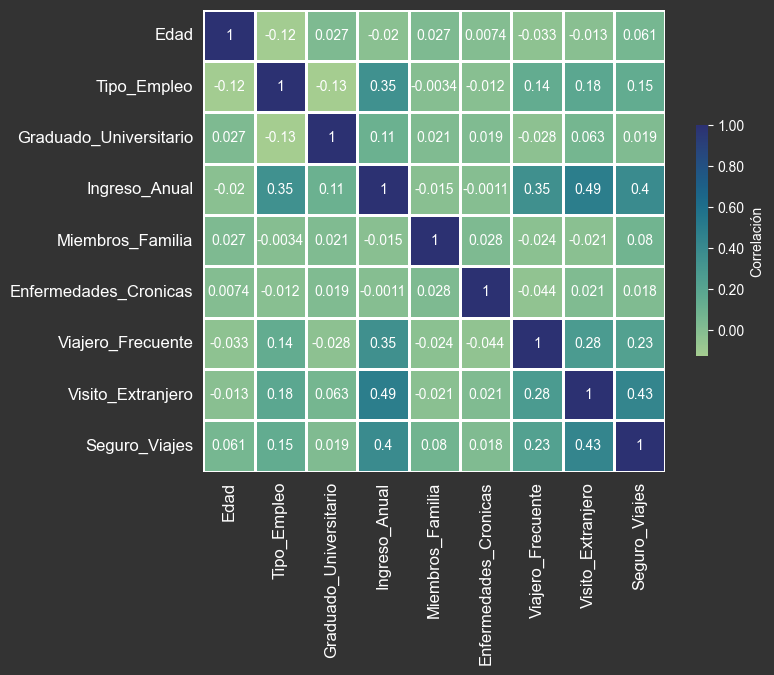

In [7]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = df[num_cols].corr()

sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(8,6))
plt.gcf().set_facecolor('#333333')

ax = sns.heatmap(corr_matrix, annot=True, cmap="crest", cbar=True, 
                 cbar_kws={"label": "correlation", "orientation": "vertical", 
                "shrink": 0.5, "format": "%.2f", "extend": "neither", "extendfrac": None, 
                "extendrect": False, "drawedges": False}, linewidths=1, linecolor='white', 
                square=True, annot_kws={"color": "white"})


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(color='white', labelsize=10)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), color='white')
cbar.set_label("Correlación", color='white')

labels_x = ax.get_xticklabels()
labels_y = ax.get_yticklabels()
ax.set_xticklabels(labels_x, fontsize=12, color='white')
ax.set_yticklabels(labels_y, fontsize=12, color='white')

#No exiten variables redundantes es decir no se aprecian columnas con una alta colinealidad, por lo tanto en un principio
#se pueden conservar todas.

In [8]:
df.to_csv('Travel_espanol.csv')